
# LINEAR REGRESSION WITH PYTHON



# Import libraries


In [61]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\orisco\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['var', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [62]:
#import dataiku                               # Access to Dataiku datasets
import pandas as pd, numpy as np             # Data manipulation 
from matplotlib import pyplot as plt         # Graphing
import seaborn as sns                        # Graphing
import statsmodels.api as sm                    # Statistical analysis
#sns.set(style="white")                       # Tuning the style of charts
import warnings                              # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from scipy import stats                      # Stats


# Check out data


In [63]:
# Example: load a DSS dataset as a Pandas dataframe
#mydataset = dataiku.Dataset("wage")
mydataset_df = pd.read_excel('Houses_for_rent_in_madrid_assignment_2023_prepared.xlsx','Sheet1')

In [64]:
mydataset_df.head() 

,Id,District,atico,House Type,Number,Area,Rent,lnRent,Bedrooms,Sq.Mt,lnSq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,1390,centro,atico en calle de alberto aguilera,atico,11,malasana universidad,2490,7.820038,0,97,4.574711,7.0,1,1,1,0,0,0
1,1896,san blas,piso en calle luis sanchez polack tip,piso,-99,simancas,1300,7.170120,3,110,4.700480,4.0,1,1,0,0,0,0
2,1407,carabanchel,piso en san isidro,piso,-99,san isidro,600,6.396930,1,45,3.806662,2.0,1,1,0,0,0,0
3,1072,arganzuela,atico en acacias,atico,-99,acacias,1900,7.549609,0,90,4.499810,7.0,1,1,1,0,0,0
4,690,retiro,piso en calle alcalde sainz de baranda,piso,-99,ibiza,1500,7.313220,4,110,4.700480,3.0,1,1,0,0,0,0


In [65]:
mydataset_df.describe()

,Id,Number,Rent,lnRent,Bedrooms,Sq.Mt,lnSq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,1093.739850,-50.415038,1965.871679,7.377889,2.203509,130.869674,4.637935,3.432832,0.880702,0.955388,0.082206,0.044110,0.031078,0.014035
std,629.646786,70.722984,1512.787081,0.610356,1.493109,117.431087,0.635297,3.039856,0.324220,0.206501,0.274746,0.205392,0.173571,0.117665
min,1.000000,-99.000000,450.000000,6.109248,0.000000,20.000000,2.995732,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,553.500000,-99.000000,985.000000,6.892629,1.000000,65.000000,4.174387,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1091.000000,-99.000000,1450.000000,7.279319,2.000000,92.000000,4.521789,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1635.500000,11.000000,2500.000000,7.824046,3.000000,150.000000,5.010635,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2188.000000,508.000000,16000.000000,9.680344,8.000000,1250.000000,7.130899,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
selected_fields=mydataset_df.drop(labels=["Id","atico ","House Type","Number","Area","lnRent","lnSq.Mt"],axis=1) #remove fields with no useful
metric_fields = selected_fields.drop(labels=["District"],axis=1) 

In [67]:
null_counts = selected_fields.isnull().sum()
print(null_counts)

District        0
Rent            0
Bedrooms        0
Sq.Mt           0
Floor           0
Outer           0
Elevator        0
Penthouse       0
Cottage         0
Duplex          0
Semidetached    0
dtype: int64


In [68]:
selected_fields.columns

Index(['District', 'Rent', 'Bedrooms', 'Sq.Mt', 'Floor', 'Outer', 'Elevator',
       'Penthouse', 'Cottage', 'Duplex', 'Semidetached'],
      dtype='object')

# Exploratory Data Analysis


In [69]:
selected_fields

,District,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,centro,2490,0,97,7.0,1,1,1,0,0,0
1,san blas,1300,3,110,4.0,1,1,0,0,0,0
2,carabanchel,600,1,45,2.0,1,1,0,0,0,0
3,arganzuela,1900,0,90,7.0,1,1,1,0,0,0
4,retiro,1500,4,110,3.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1990,centro,1450,3,100,4.0,1,1,0,0,0,0
1991,moratalaz,900,3,85,4.0,1,1,0,0,0,0
1992,salamanca,3500,5,300,3.0,1,1,0,0,0,0
1993,chamberi,1299,2,90,0.0,0,1,0,0,0,0


In [70]:
metric_fields.columns

Index(['Rent', 'Bedrooms', 'Sq.Mt', 'Floor', 'Outer', 'Elevator', 'Penthouse',
       'Cottage', 'Duplex', 'Semidetached'],
      dtype='object')

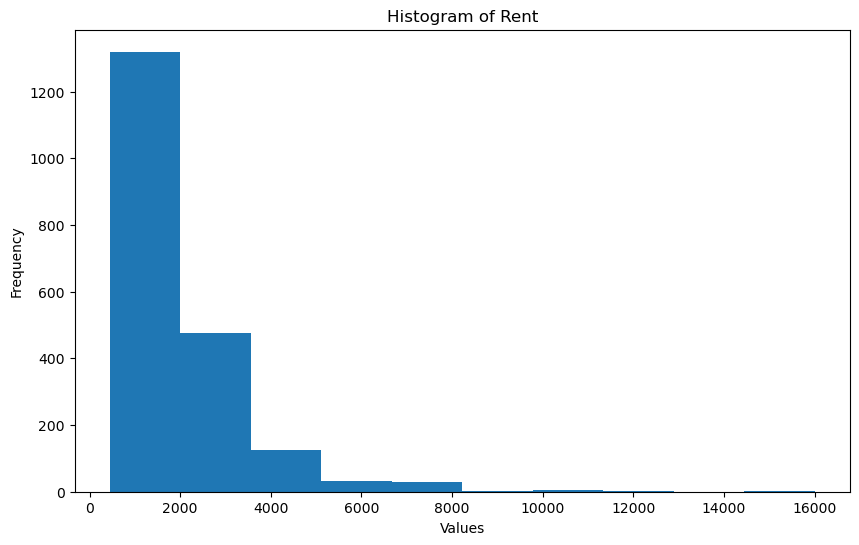

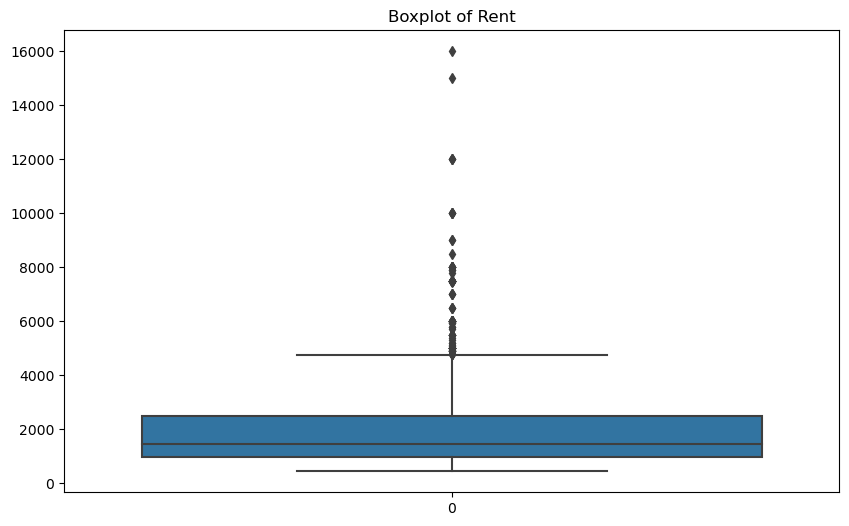

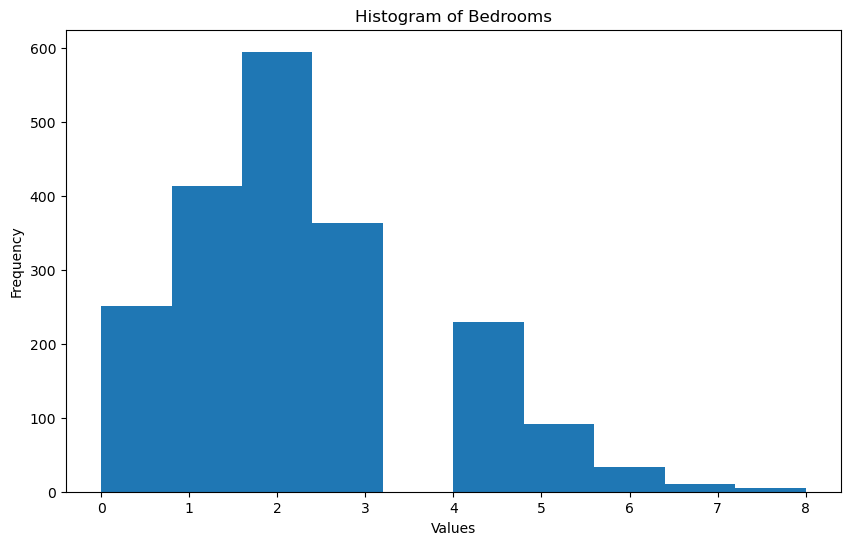

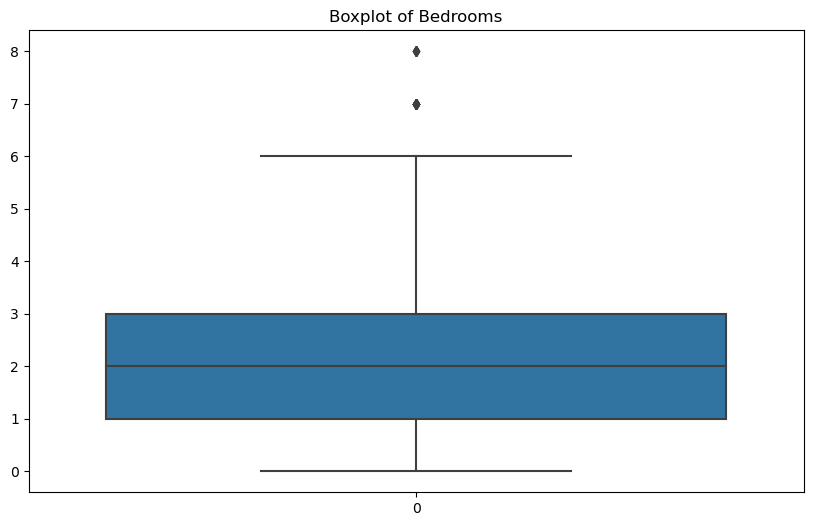

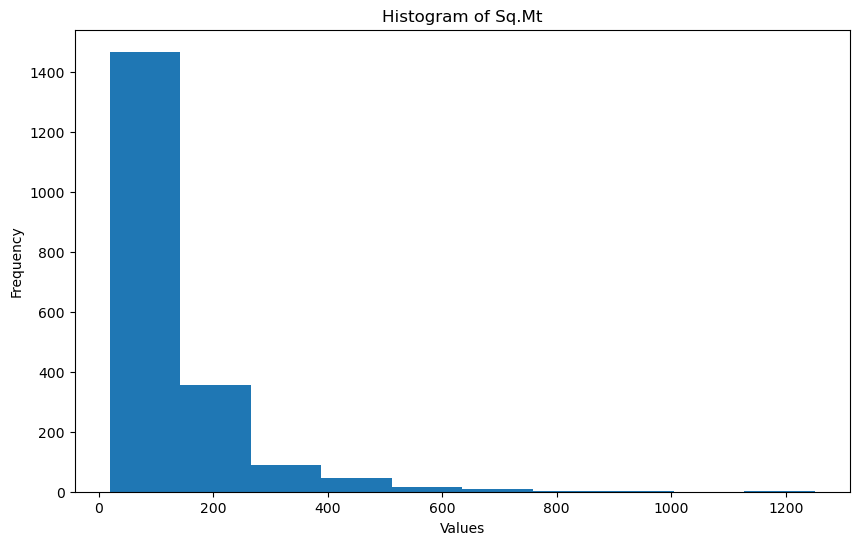

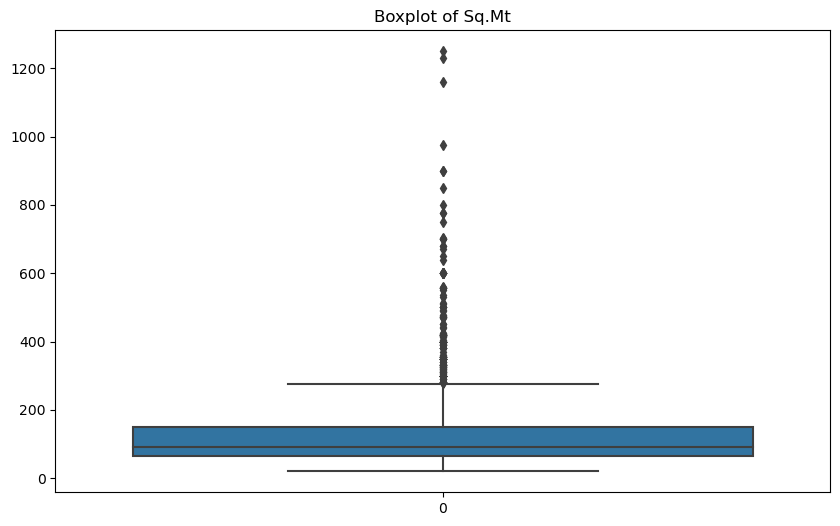

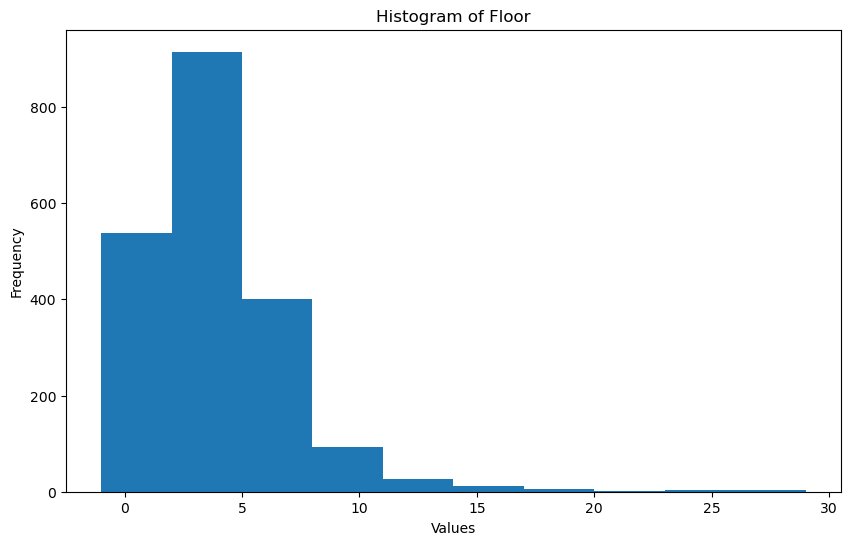

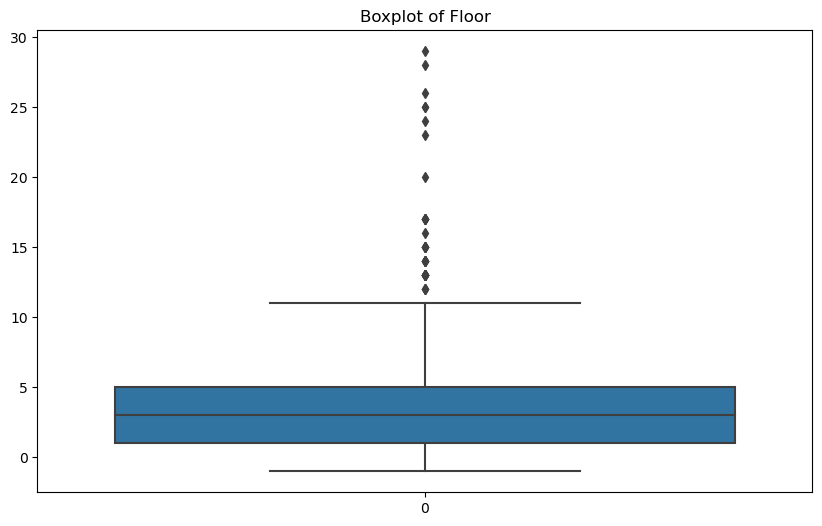

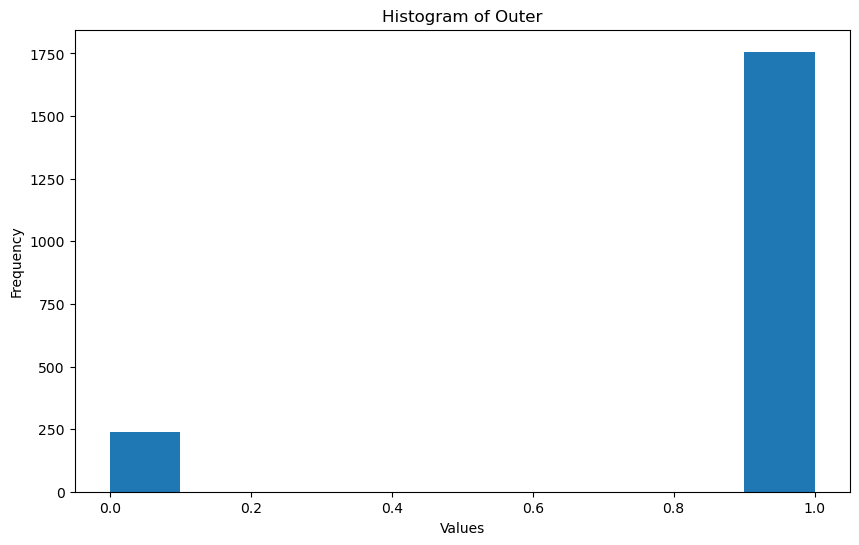

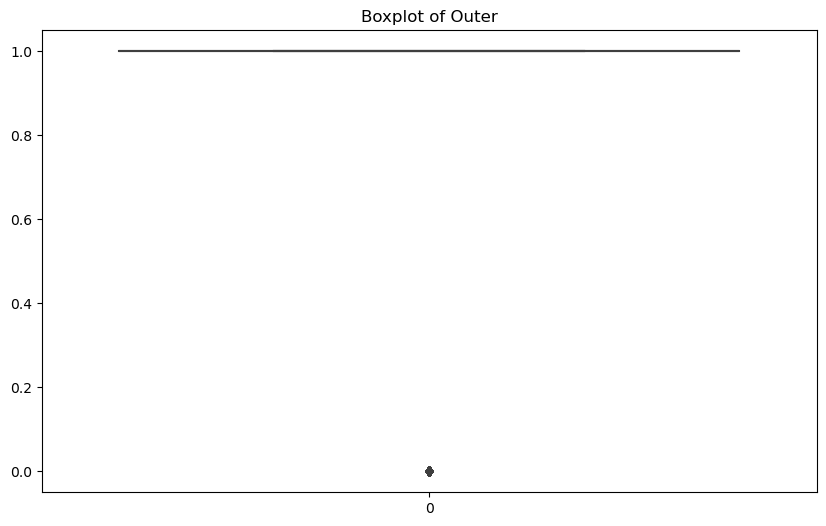

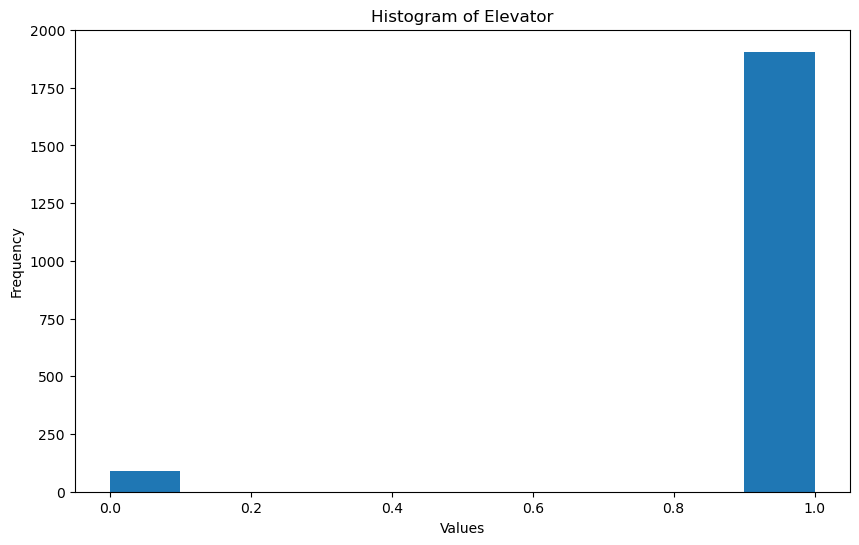

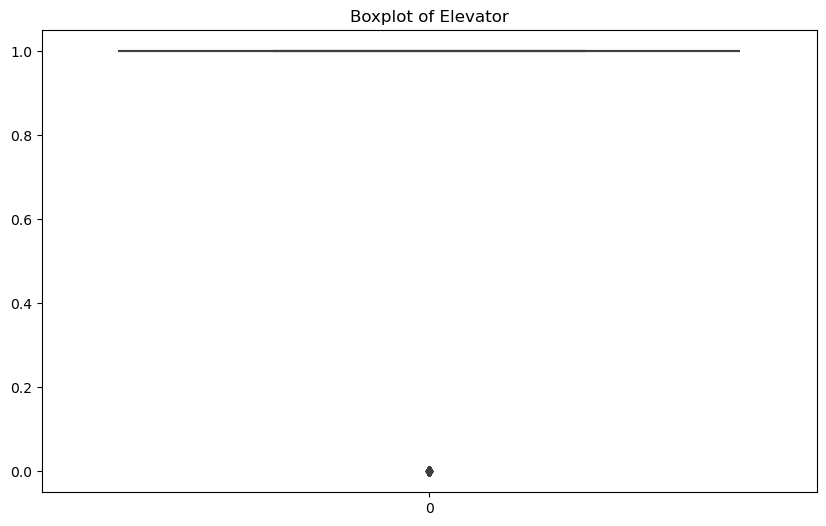

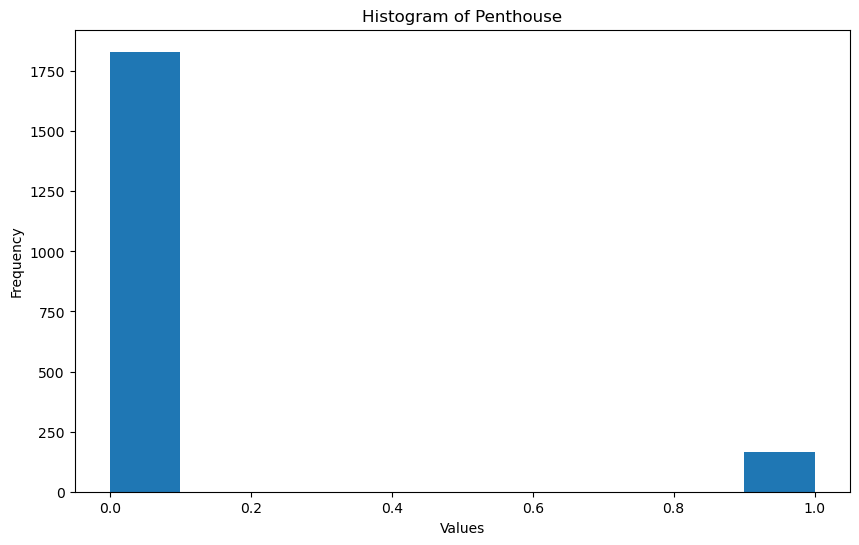

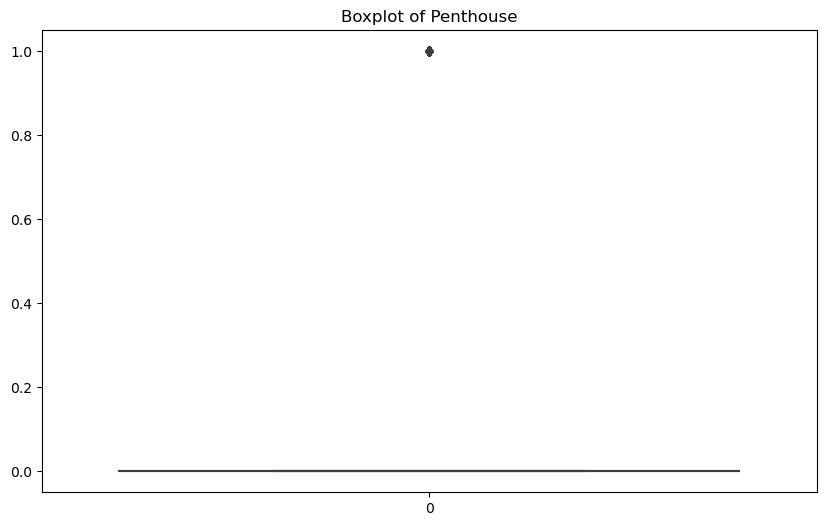

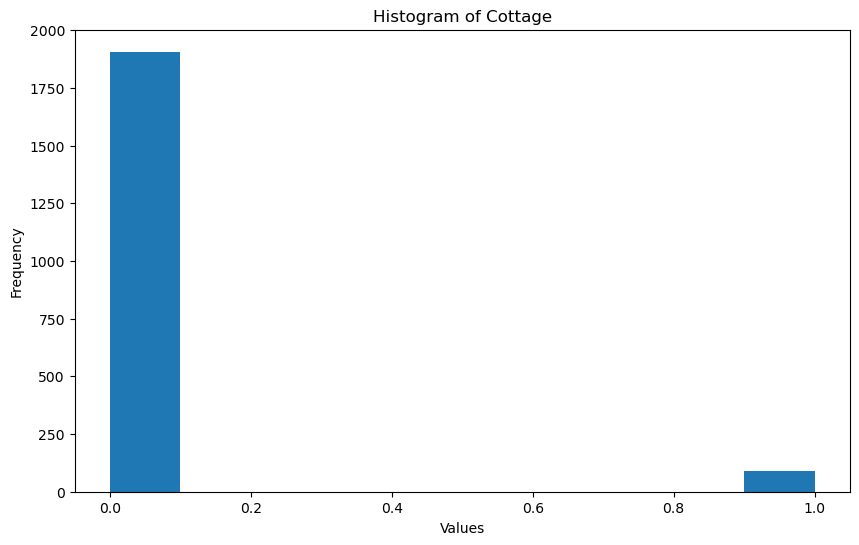

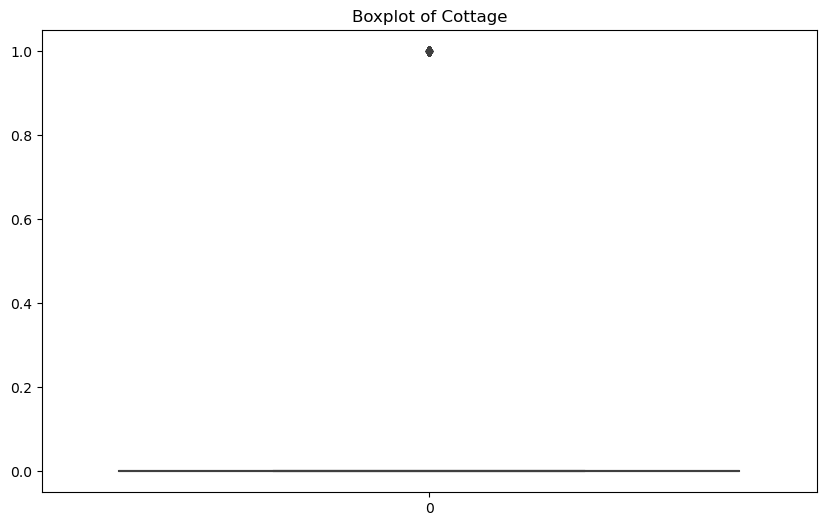

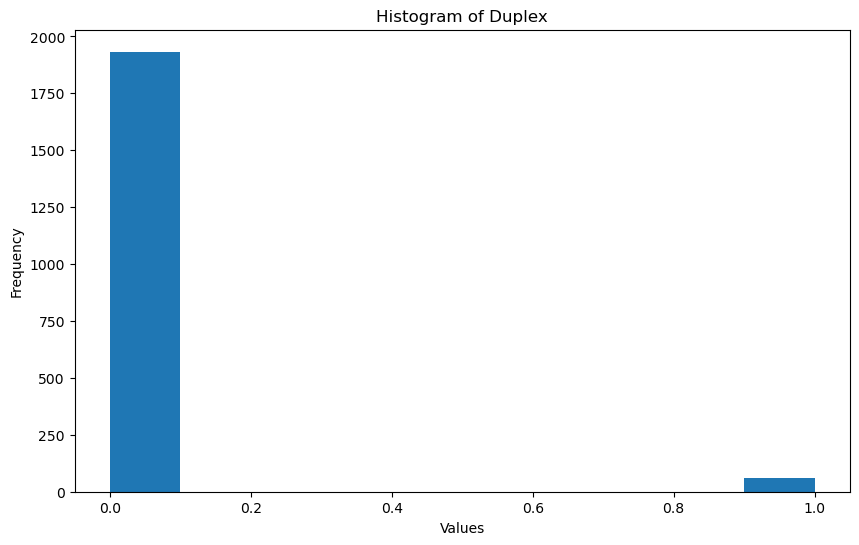

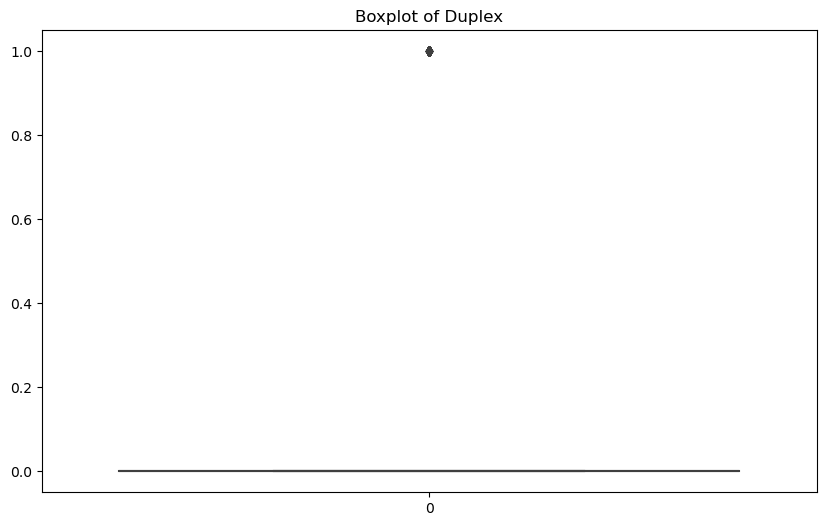

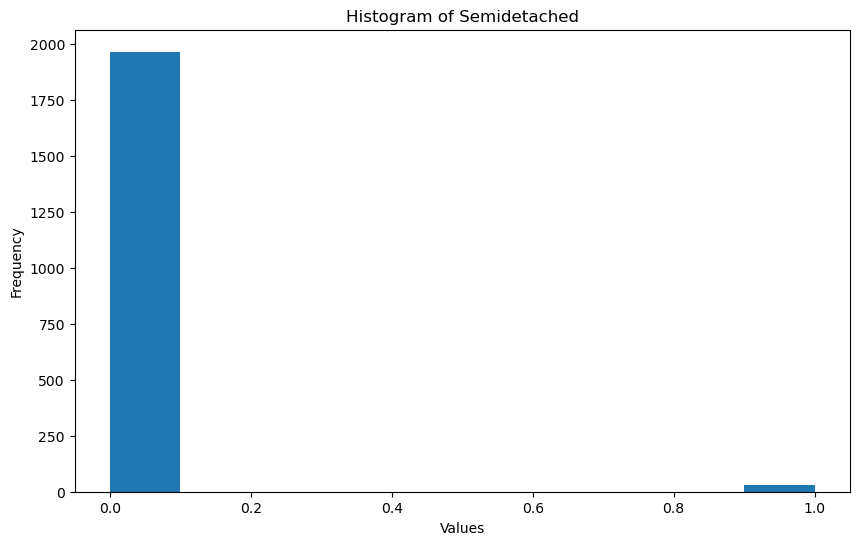

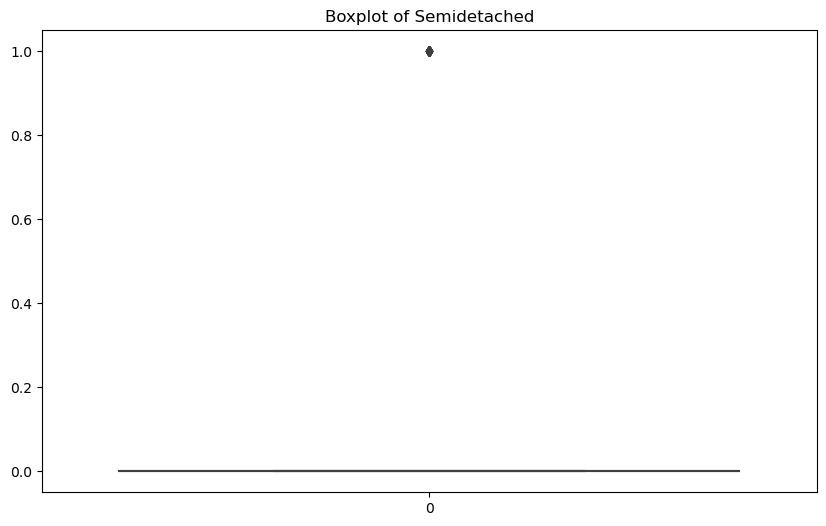

In [71]:
numerical_vars = metric_fields.columns

for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    plt.hist(selected_fields[var], bins=10)  # Adjust the number of bins as per your preference
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var}')
    plt.show()
    
    # Now add the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(selected_fields[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

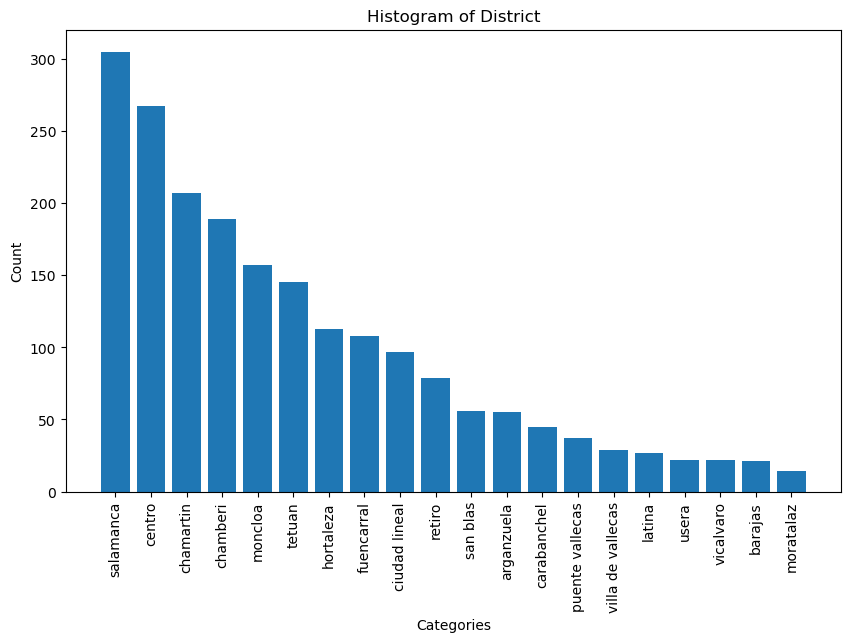

In [72]:
string_var = 'District'  # Replace with the name of your string variable column

value_counts = selected_fields[string_var].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Histogram of District')
plt.xticks(rotation=90)
plt.show()

C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\1366206406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(selected_fields['Rent'])


<AxesSubplot: xlabel='Rent', ylabel='Density'>

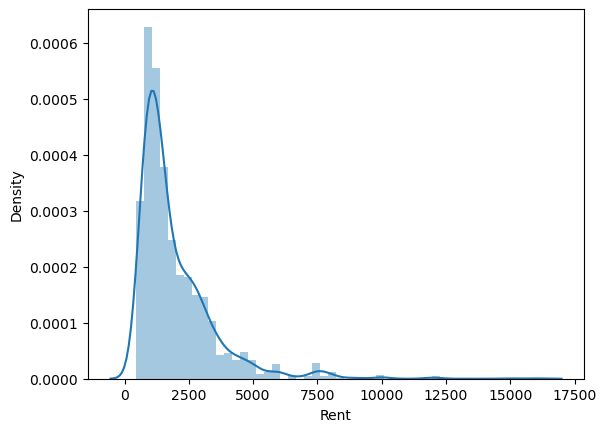

In [73]:
sns.distplot(selected_fields['Rent'])

In [74]:
selected_fields.corr()

C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\1116862397.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  selected_fields.corr()


,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
Rent,1.000000,0.511808,0.824918,0.025911,0.176004,-0.377400,0.087480,0.380029,0.039257,0.115530
Bedrooms,0.511808,1.000000,0.650283,-0.142063,0.185888,-0.414581,-0.438116,0.415518,0.054923,0.203534
Sq.Mt,0.824918,0.650283,1.000000,-0.094589,0.198897,-0.606169,0.026151,0.607591,0.064441,0.215107
Floor,0.025911,-0.142063,-0.094589,1.000000,0.077860,0.244086,0.222783,-0.242647,0.022017,-0.134768
Outer,0.176004,0.185888,0.198897,0.077860,1.000000,-0.079531,0.070739,0.079062,0.021357,0.043912
Elevator,-0.377400,-0.414581,-0.606169,0.244086,-0.079531,1.000000,0.064671,-0.994105,0.038700,-0.552132
Penthouse,0.087480,-0.438116,0.026151,0.222783,0.070739,0.064671,1.000000,-0.064290,-0.053599,-0.035707
Cottage,0.380029,0.415518,0.607591,-0.242647,0.079062,-0.994105,-0.064290,1.000000,-0.038472,0.555406
Duplex,0.039257,0.054923,0.064441,0.022017,0.021357,0.038700,-0.053599,-0.038472,1.000000,-0.021368
Semidetached,0.115530,0.203534,0.215107,-0.134768,0.043912,-0.552132,-0.035707,0.555406,-0.021368,1.000000


C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\3742885142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(selected_fields.corr())


<AxesSubplot: >

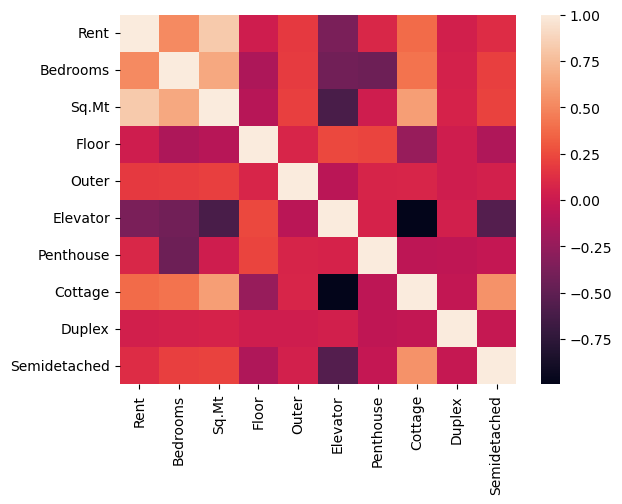

In [75]:
sns.heatmap(selected_fields.corr())

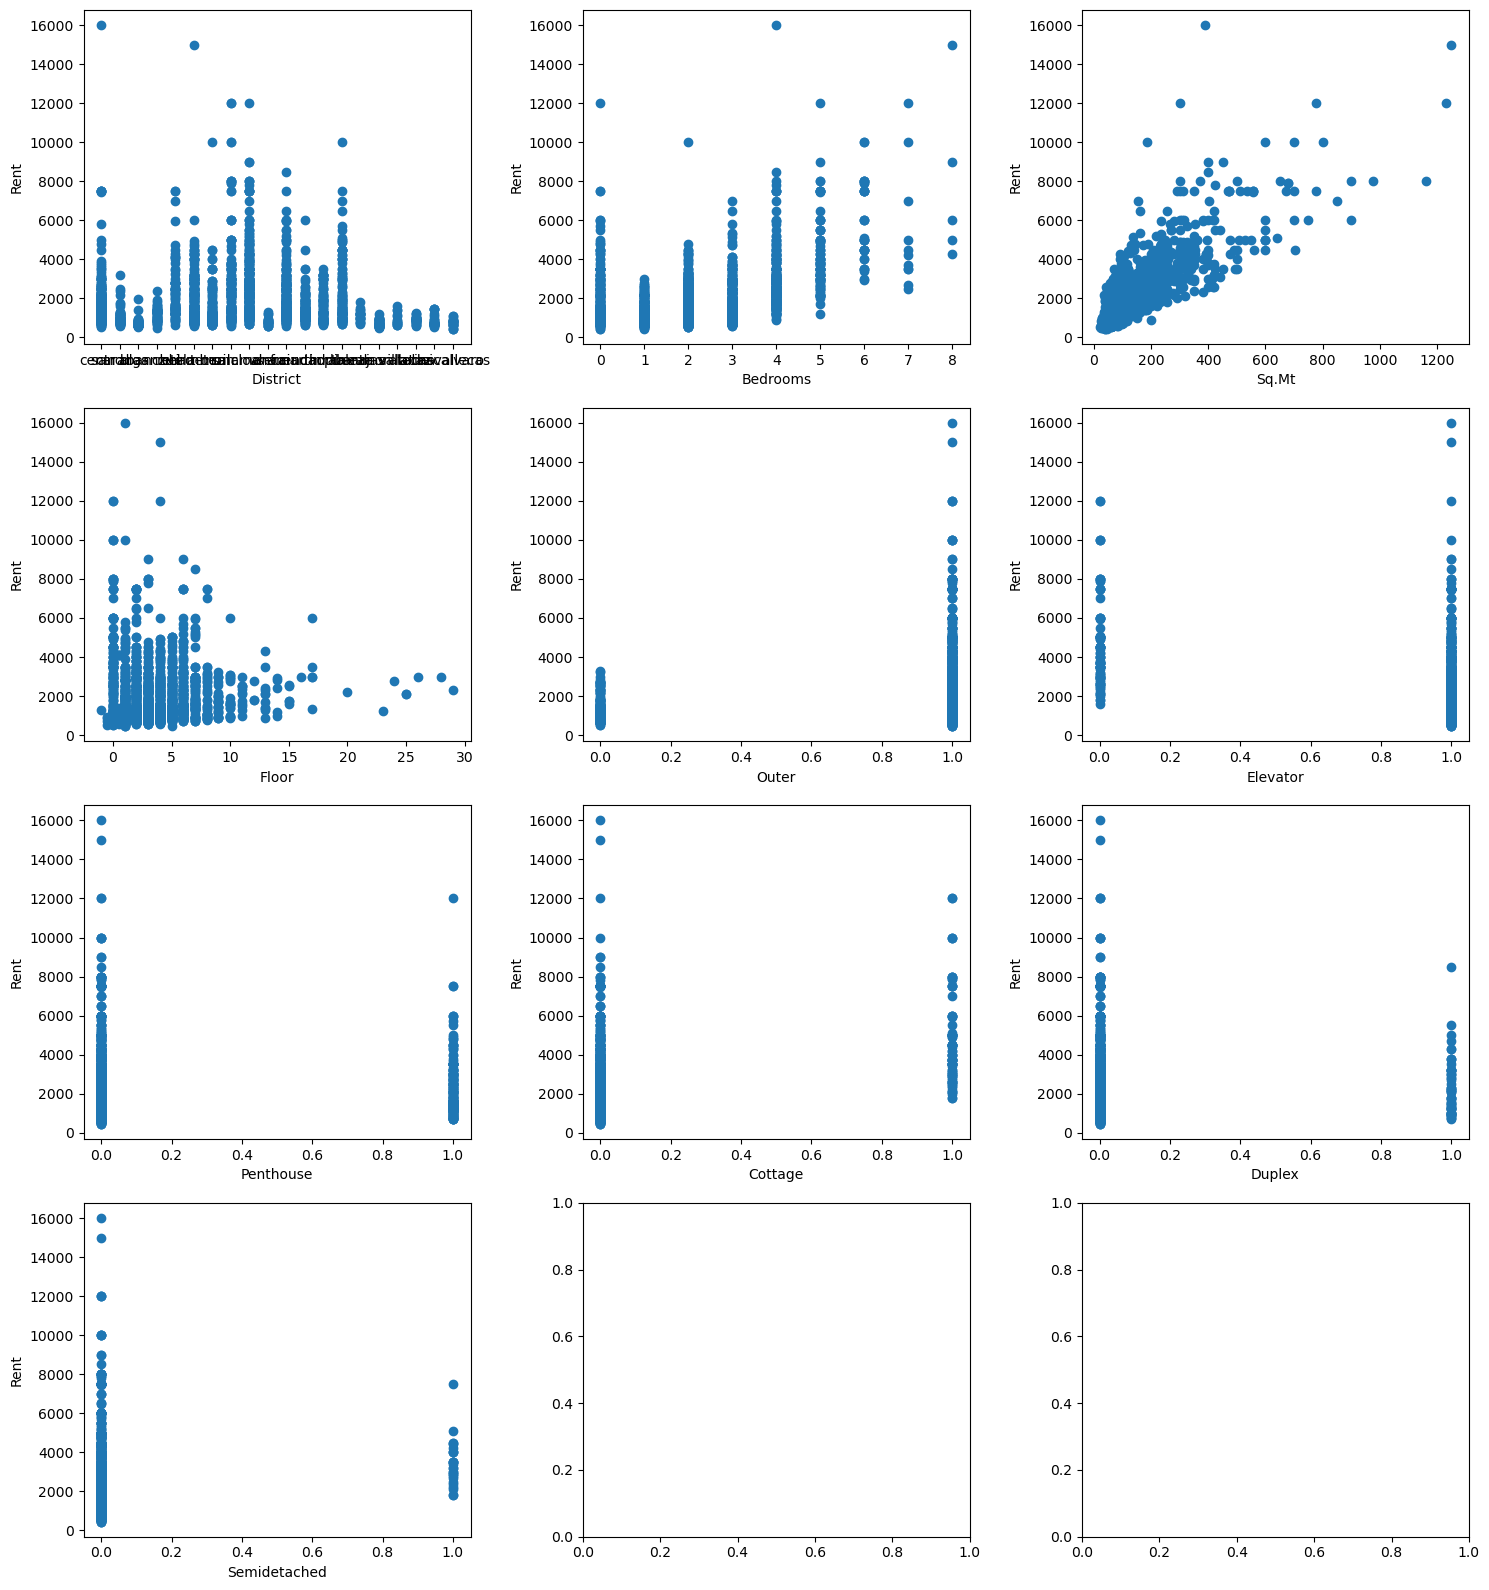

In [76]:
dependent_variable = 'Rent'  

# Get a list of all variable names except the dependent variable
independent_variables = selected_fields.columns[selected_fields.columns != dependent_variable]

# Set up the subplot grid
num_plots = len(independent_variables)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Plot scatter plots for each variable against the dependent variable
for i, variable in enumerate(independent_variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.scatter(selected_fields[variable], selected_fields[dependent_variable])
    ax.set_xlabel(variable)
    ax.set_ylabel(dependent_variable)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

In [77]:
selected_fields = selected_fields[selected_fields['Rent'] < 10000]

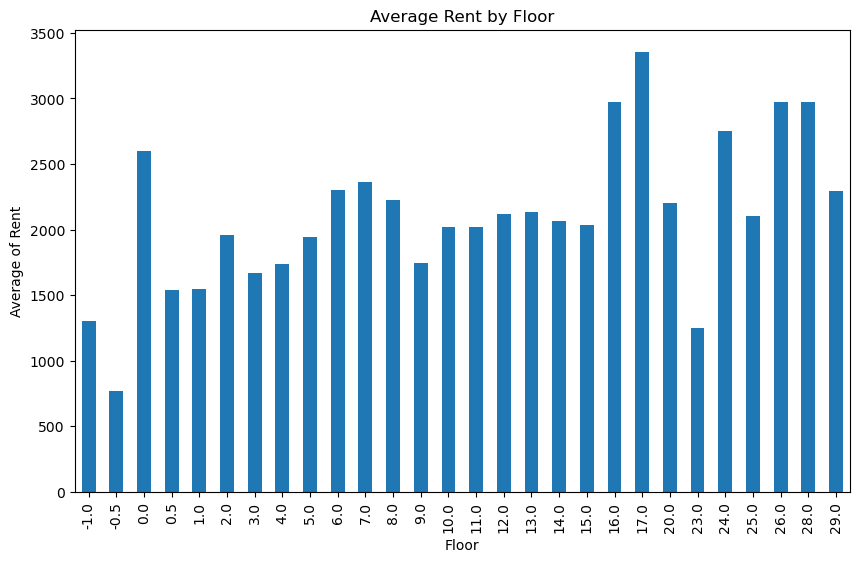

In [78]:
grouped_df = selected_fields.groupby('Floor')['Rent'].mean()
grouped_df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Floor')
plt.ylabel('Average of ' + 'Rent')
plt.title('Average ' + 'Rent' + ' by ' + 'Floor')

plt.show()

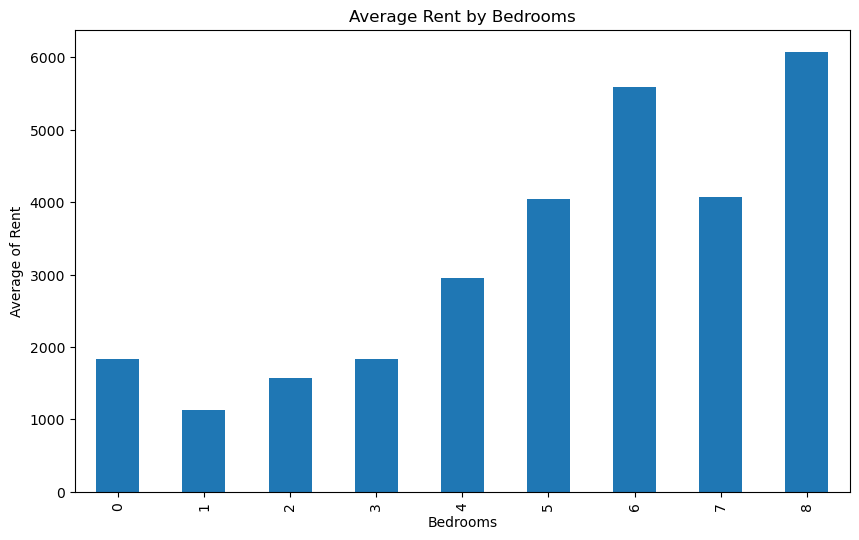

In [79]:
grouped_df = selected_fields.groupby('Bedrooms')['Rent'].mean()
grouped_df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Bedrooms')
plt.ylabel('Average of ' + 'Rent')
plt.title('Average ' + 'Rent' + ' by ' + 'Bedrooms')

plt.show()

In [80]:
selected_fields

,District,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,centro,2490,0,97,7.0,1,1,1,0,0,0
1,san blas,1300,3,110,4.0,1,1,0,0,0,0
2,carabanchel,600,1,45,2.0,1,1,0,0,0,0
3,arganzuela,1900,0,90,7.0,1,1,1,0,0,0
4,retiro,1500,4,110,3.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1990,centro,1450,3,100,4.0,1,1,0,0,0,0
1991,moratalaz,900,3,85,4.0,1,1,0,0,0,0
1992,salamanca,3500,5,300,3.0,1,1,0,0,0,0
1993,chamberi,1299,2,90,0.0,0,1,0,0,0,0


In [81]:
#eliminate bedrooms and cottage because of sq.mt
#del selected_fields['Bedrooms'] 
#del selected_fields['Cottage']
selected_fields.corr()  

C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\3809324347.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  selected_fields.corr()


,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
Rent,1.000000,0.517803,0.822577,0.052758,0.185068,-0.360172,0.094679,0.362837,0.049974,0.133474
Bedrooms,0.517803,1.000000,0.647785,-0.136440,0.185439,-0.400245,-0.440413,0.401162,0.057257,0.207484
Sq.Mt,0.822577,0.647785,1.000000,-0.084319,0.206504,-0.599432,0.032500,0.600754,0.073880,0.235394
Floor,0.052758,-0.136440,-0.084319,1.000000,0.079312,0.238032,0.222508,-0.236549,0.021441,-0.135448
Outer,0.185068,0.185439,0.206504,0.079312,1.000000,-0.077545,0.070797,0.077061,0.021664,0.044126
Elevator,-0.360172,-0.400245,-0.599432,0.238032,-0.077545,1.000000,0.062840,-0.993769,0.037725,-0.569034
Penthouse,0.094679,-0.440413,0.032500,0.222508,0.070797,0.062840,1.000000,-0.062448,-0.053678,-0.035758
Cottage,0.362837,0.401162,0.600754,-0.236549,0.077061,-0.993769,-0.062448,1.000000,-0.037490,0.572602
Duplex,0.049974,0.057257,0.073880,0.021441,0.021664,0.037725,-0.053678,-0.037490,1.000000,-0.021467
Semidetached,0.133474,0.207484,0.235394,-0.135448,0.044126,-0.569034,-0.035758,0.572602,-0.021467,1.000000


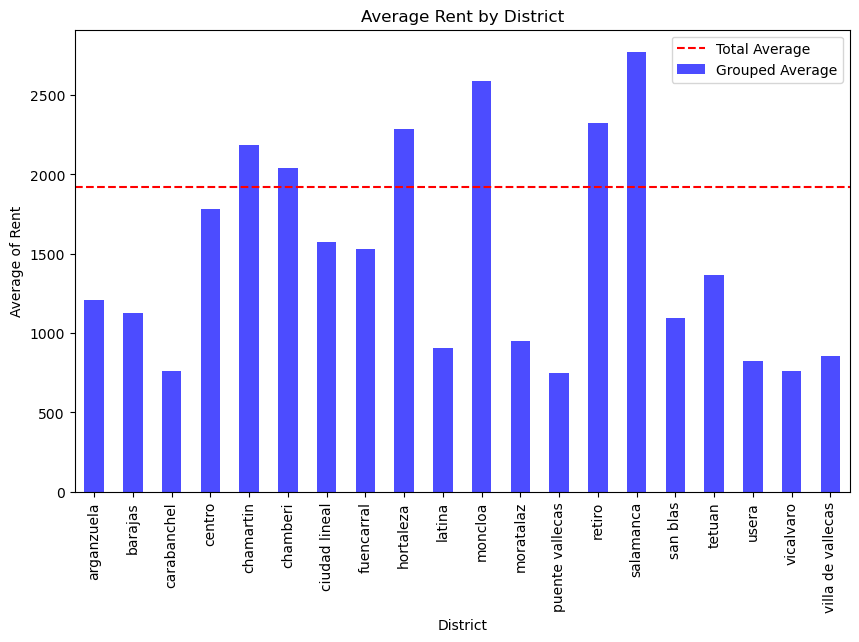

In [82]:
string_variable = 'District' 
dependent_variable = 'Rent' 

grouped_df = selected_fields.groupby(string_variable)[dependent_variable].mean()
total_average = selected_fields[dependent_variable].mean()

# Plotting the grouped averages as a bar plot
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', color='blue', alpha=0.7, label='Grouped Average')

# Plotting the total average as a horizontal line
plt.axhline(total_average, color='red', linestyle='--', label='Total Average')

plt.xlabel(string_variable)
plt.ylabel('Average of ' + dependent_variable)
plt.title('Average ' + dependent_variable + ' by ' + string_variable)
plt.legend()

plt.show()

In [83]:
selected_fields['lnRent'] = np.log(selected_fields['Rent'])
selected_fields['lnSq.Mt'] = np.log(selected_fields['Sq.Mt']) 
selected_fields.corr()  

C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\1910330160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_fields['lnRent'] = np.log(selected_fields['Rent'])
C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\1910330160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_fields['lnSq.Mt'] = np.log(selected_fields['Sq.Mt'])
C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\1910330160.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future 

,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,lnRent,lnSq.Mt
Rent,1.000000,0.517803,0.822577,0.052758,0.185068,-0.360172,0.094679,0.362837,0.049974,0.133474,0.935880,0.808392
Bedrooms,0.517803,1.000000,0.647785,-0.136440,0.185439,-0.400245,-0.440413,0.401162,0.057257,0.207484,0.515098,0.694860
Sq.Mt,0.822577,0.647785,1.000000,-0.084319,0.206504,-0.599432,0.032500,0.600754,0.073880,0.235394,0.746098,0.902279
Floor,0.052758,-0.136440,-0.084319,1.000000,0.079312,0.238032,0.222508,-0.236549,0.021441,-0.135448,0.118041,-0.002988
Outer,0.185068,0.185439,0.206504,0.079312,1.000000,-0.077545,0.070797,0.077061,0.021664,0.044126,0.204231,0.294943
Elevator,-0.360172,-0.400245,-0.599432,0.238032,-0.077545,1.000000,0.062840,-0.993769,0.037725,-0.569034,-0.318347,-0.455666
Penthouse,0.094679,-0.440413,0.032500,0.222508,0.070797,0.062840,1.000000,-0.062448,-0.053678,-0.035758,0.118728,0.071042
Cottage,0.362837,0.401162,0.600754,-0.236549,0.077061,-0.993769,-0.062448,1.000000,-0.037490,0.572602,0.320138,0.455205
Duplex,0.049974,0.057257,0.073880,0.021441,0.021664,0.037725,-0.053678,-0.037490,1.000000,-0.021467,0.061335,0.098578
Semidetached,0.133474,0.207484,0.235394,-0.135448,0.044126,-0.569034,-0.035758,0.572602,-0.021467,1.000000,0.144646,0.221912


C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\3742885142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(selected_fields.corr())


<AxesSubplot: >

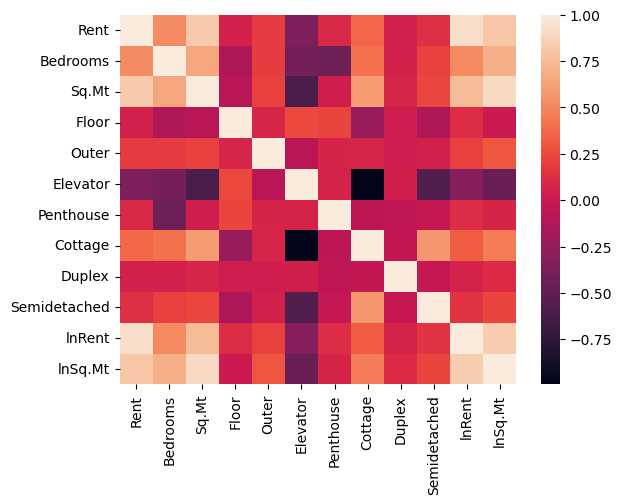

In [84]:
sns.heatmap(selected_fields.corr())

In [85]:
selected_fields['Bedrooms / Sq.Mt'] = selected_fields['Bedrooms']/selected_fields['Sq.Mt']
selected_fields['Elevator x Penthouse'] = selected_fields['Penthouse'] * selected_fields['Elevator']
selected_fields['Bedrooms x Duplex'] = selected_fields['Bedrooms'] * selected_fields['Duplex']
selected_fields['Outer x Penthouse'] = selected_fields['Outer'] * selected_fields['Penthouse']
selected_fields['Outer x Duplex'] = selected_fields['Outer'] * selected_fields['Duplex']
del selected_fields['lnRent']
del selected_fields['lnSq.Mt']

C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\1820148092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_fields['Bedrooms / Sq.Mt'] = selected_fields['Bedrooms']/selected_fields['Sq.Mt']
C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\1820148092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_fields['Elevator x Penthouse'] = selected_fields['Penthouse'] * selected_fields['Elevator']
C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\1820148092.py:3: SettingWithCopyWarning: 

In [86]:
selected_fields.corr()  

C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\686648546.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  selected_fields.corr()


,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,Bedrooms / Sq.Mt,Elevator x Penthouse,Bedrooms x Duplex,Outer x Penthouse,Outer x Duplex
Rent,1.000000,0.517803,0.822577,0.052758,0.185068,-0.360172,0.094679,0.362837,0.049974,0.133474,-0.291909,0.094679,0.093904,0.102817,0.055519
Bedrooms,0.517803,1.000000,0.647785,-0.136440,0.185439,-0.400245,-0.440413,0.401162,0.057257,0.207484,0.412538,-0.440413,0.125461,-0.429864,0.063633
Sq.Mt,0.822577,0.647785,1.000000,-0.084319,0.206504,-0.599432,0.032500,0.600754,0.073880,0.235394,-0.261816,0.032500,0.125565,0.037840,0.082707
Floor,0.052758,-0.136440,-0.084319,1.000000,0.079312,0.238032,0.222508,-0.236549,0.021441,-0.135448,-0.112985,0.222508,0.027604,0.220917,0.021555
Outer,0.185068,0.185439,0.206504,0.079312,1.000000,-0.077545,0.070797,0.077061,0.021664,0.044126,-0.073465,0.070797,0.032053,0.107734,0.063429
Elevator,-0.360172,-0.400245,-0.599432,0.238032,-0.077545,1.000000,0.062840,-0.993769,0.037725,-0.569034,0.124909,0.062840,0.033506,0.061358,0.036125
Penthouse,0.094679,-0.440413,0.032500,0.222508,0.070797,0.062840,1.000000,-0.062448,-0.053678,-0.035758,-0.541316,1.000000,-0.047674,0.976419,-0.051401
Cottage,0.362837,0.401162,0.600754,-0.236549,0.077061,-0.993769,-0.062448,1.000000,-0.037490,0.572602,-0.124259,-0.062448,-0.033297,-0.060976,-0.035900
Duplex,0.049974,0.057257,0.073880,0.021441,0.021664,0.037725,-0.053678,-0.037490,1.000000,-0.021467,-0.036995,-0.053678,0.888156,-0.052412,0.957586
Semidetached,0.133474,0.207484,0.235394,-0.135448,0.044126,-0.569034,-0.035758,0.572602,-0.021467,1.000000,-0.051966,-0.035758,-0.019066,-0.034915,-0.020556


C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\3742885142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(selected_fields.corr())


<AxesSubplot: >

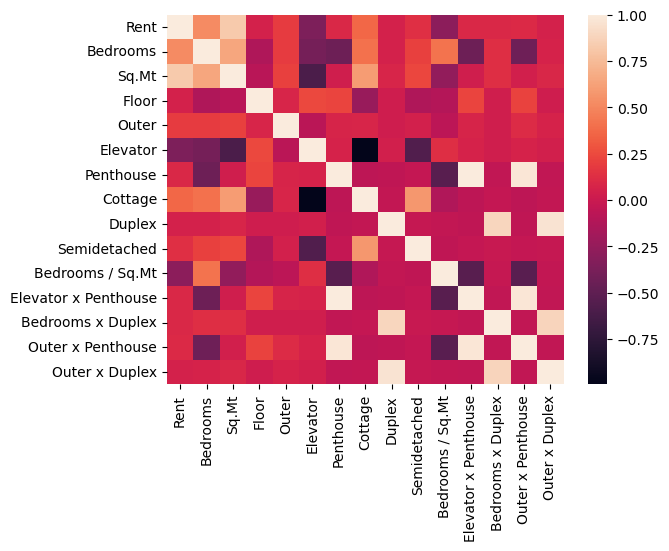

In [87]:
sns.heatmap(selected_fields.corr())

In [88]:
selected_fields = pd.get_dummies(selected_fields, columns=['District'], drop_first=True, prefix='District')
selected_fields

,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,...,District_moncloa,District_moratalaz,District_puente vallecas,District_retiro,District_salamanca,District_san blas,District_tetuan,District_usera,District_vicalvaro,District_villa de vallecas
0,2490,0,97,7.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1300,3,110,4.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,600,1,45,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1900,0,90,7.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1500,4,110,3.0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1450,3,100,4.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1991,900,3,85,4.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1992,3500,5,300,3.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1993,1299,2,90,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X = selected_fields.drop(labels=['Rent'],axis=1) # wage variable cannot be used as explanatory
y = selected_fields['Rent'] # dependent variable

In [90]:
X.columns

Index(['Bedrooms', 'Sq.Mt', 'Floor', 'Outer', 'Elevator', 'Penthouse',
       'Cottage', 'Duplex', 'Semidetached', 'Bedrooms / Sq.Mt',
       'Elevator x Penthouse', 'Bedrooms x Duplex', 'Outer x Penthouse',
       'Outer x Duplex', 'District_barajas', 'District_carabanchel',
       'District_centro', 'District_chamartin', 'District_chamberi',
       'District_ciudad lineal', 'District_fuencarral', 'District_hortaleza',
       'District_latina', 'District_moncloa', 'District_moratalaz',
       'District_puente vallecas', 'District_retiro', 'District_salamanca',
       'District_san blas', 'District_tetuan', 'District_usera',
       'District_vicalvaro', 'District_villa de vallecas'],
      dtype='object')

## Train Test Split


In [91]:
from sklearn.model_selection import train_test_split # to include if we want to split the data

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #- to include if we want to split the data

## Creating and Training the Model

In [93]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train) # adding a constant
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     175.6
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:48:05   Log-Likelihood:                -12491.
No. Observations:                1588   AIC:                         2.505e+04
Df Residuals:                    1555   BIC:                         2.522e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [94]:
X_train_f1 = X_train[['const','Sq.Mt','Floor','Outer','Bedrooms / Sq.Mt','District_carabanchel','District_centro','District_chamartin','District_chamberi','District_fuencarral','District_retiro','District_salamanca','District_vicalvaro']]
model = sm.OLS(y_train, X_train_f1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     434.3
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:48:05   Log-Likelihood:                -12545.
No. Observations:                1588   AIC:                         2.512e+04
Df Residuals:                    1575   BIC:                         2.519e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -14.5697 

In [95]:
X_train_f2 = X_train[['const','Sq.Mt','Floor','Outer','District_centro','District_chamartin','District_chamberi','District_fuencarral','District_retiro','District_salamanca']]
model = sm.OLS(y_train, X_train_f2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     575.7
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:48:05   Log-Likelihood:                -12550.
No. Observations:                1588   AIC:                         2.512e+04
Df Residuals:                    1578   BIC:                         2.517e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -100.9489    

In [96]:
selected_fields[['Sq.Mt','Floor','Outer','District_centro','District_chamartin','District_chamberi','District_fuencarral','District_retiro','District_salamanca']].corr()

,Sq.Mt,Floor,Outer,District_centro,District_chamartin,District_chamberi,District_fuencarral,District_retiro,District_salamanca
Sq.Mt,1.000000,-0.084319,0.206504,-0.120499,0.018983,-0.020899,0.015606,0.010234,0.084404
Floor,-0.084319,1.000000,0.079312,-0.064646,0.072758,0.036294,0.038797,0.002098,0.050243
Outer,0.206504,0.079312,1.000000,-0.109810,0.039611,-0.124298,0.081651,-0.091488,-0.049816
District_centro,-0.120499,-0.064646,-0.109810,1.000000,-0.134145,-0.127163,-0.094306,-0.080041,-0.167186
District_chamartin,0.018983,0.072758,0.039611,-0.134145,1.000000,-0.110301,-0.081802,-0.069428,-0.145018
District_chamberi,-0.020899,0.036294,-0.124298,-0.127163,-0.110301,1.000000,-0.077544,-0.065815,-0.137470
District_fuencarral,0.015606,0.038797,0.081651,-0.094306,-0.081802,-0.077544,1.000000,-0.048809,-0.101950
District_retiro,0.010234,0.002098,-0.091488,-0.080041,-0.069428,-0.065815,-0.048809,1.000000,-0.086529
District_salamanca,0.084404,0.050243,-0.049816,-0.167186,-0.145018,-0.137470,-0.101950,-0.086529,1.000000


<AxesSubplot: >

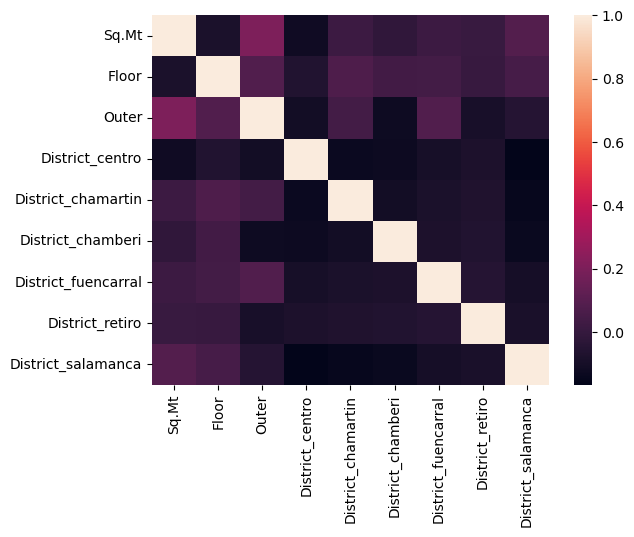

In [97]:
sns.heatmap(selected_fields[['Sq.Mt','Floor','Outer','District_centro','District_chamartin','District_chamberi','District_fuencarral','District_retiro','District_salamanca']].corr())

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lm = LinearRegression()

In [100]:
model=lm.fit(X_train[['Sq.Mt','Floor','Outer','District_centro','District_chamartin','District_chamberi','District_fuencarral','District_retiro','District_salamanca']],y_train)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [101]:
# print the intercept
print("Constant: ", model.intercept_)
print("R2: ", model.score(X_train[['Sq.Mt','Floor','Outer','District_centro','District_chamartin','District_chamberi','District_fuencarral','District_retiro','District_salamanca']],y_train))

Constant:  -100.94887753253579
R2:  0.7665564360585917


In [102]:
coeff_df = pd.DataFrame(model.coef_,X_train[['Sq.Mt','Floor','Outer','District_centro','District_chamartin','District_chamberi','District_fuencarral','District_retiro','District_salamanca']].columns,columns=['Coefficient'])
coeff_df

,Coefficient
Sq.Mt,10.322807
Floor,45.147358
Outer,211.436521
District_centro,608.842229
District_chamartin,518.051067
District_chamberi,550.027863
District_fuencarral,-144.212251
District_retiro,781.371670
District_salamanca,965.742728


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [103]:
predictions = lm.predict(X_test[['Sq.Mt','Floor','Outer','District_centro','District_chamartin','District_chamberi','District_fuencarral','District_retiro','District_salamanca']])

Text(0, 0.5, 'Predictions')

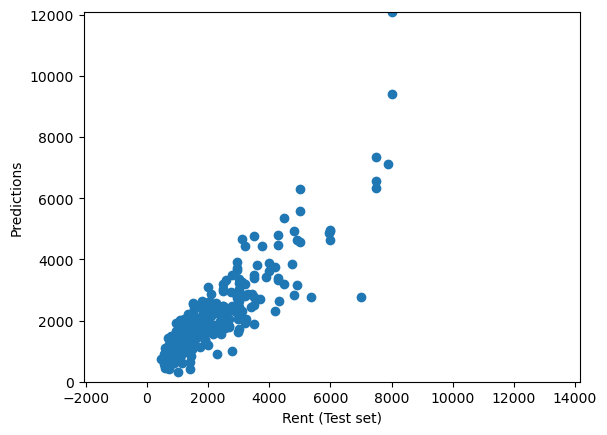

In [104]:
plt.scatter(y_test,predictions)
plt.axis('equal')
x_min = 0
x_max = max(max(y_test), max(predictions))
plt.xlim(x_min, x_max)
plt.ylim(x_min, x_max)
plt.xlabel('Rent (Test set)') # Replace with the actual name of the variable
plt.ylabel('Predictions') # Replace with the actual name of the variable


In [105]:
np.corrcoef(y_test,predictions)

array([[1.        , 0.88805474],
       [0.88805474, 1.        ]])

In [106]:
0.87414497*0.87414497

0.764129428576301

**Residual Histogram**

C:\Users\orisco\AppData\Local\Temp\ipykernel_60068\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


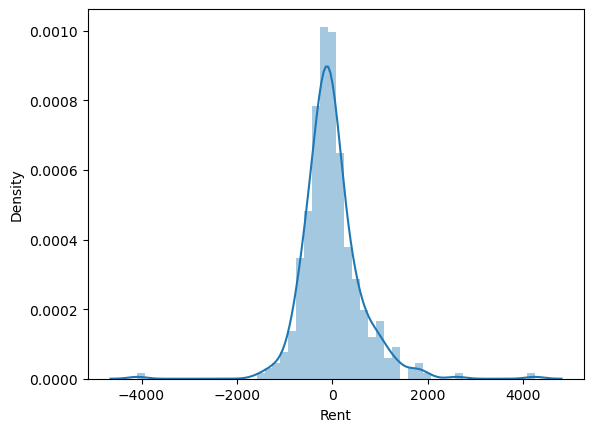

In [107]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [108]:
from sklearn import metrics

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 417.4247771867415
MSE: 385521.6730071518
RMSE: 620.903916082957


In [114]:
selected_fields['Prediction']= -100.9489  + \
selected_fields['Sq.Mt']*10.3228     +\
selected_fields['Floor'] *45.1474    +\
selected_fields['Outer'] *211.4365    +\
selected_fields['District_centro'] *608.8422  +\
selected_fields['District_chamartin']*518.0511 +\
selected_fields['District_chamberi'] *550.0279  +\
selected_fields['District_fuencarral']*-144.2123 +\
selected_fields['District_retiro']* 781.3717    +\
selected_fields['District_salamanca']*965.7427  

In [115]:
selected_fields.to_csv('Houses_for_rent_in_madrid_assignment_2023_model.csv', index = False)